In [ ]:
!pip install kaggle

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [ ]:
import os
import pandas as pd

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 700 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shashwatwork/web-page-phishing-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 33.7MB/s]


In [ ]:
!unzip web-page-phishing-detection-dataset.zip

Archive:  web-page-phishing-detection-dataset.zip
  inflating: dataset_phishing.csv    


# Loading Data

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_phishing.csv')
print(df.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

#Exploring dataset

In [ ]:
df.shape

(11430, 89)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
#missing values
df.isnull().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


Perfectly balanced dataset of phishing vs legitimate urls, oversample/undersampling adjustment not required.

<Axes: title={'center': 'Phishing vs. Legitimate'}, xlabel='status'>

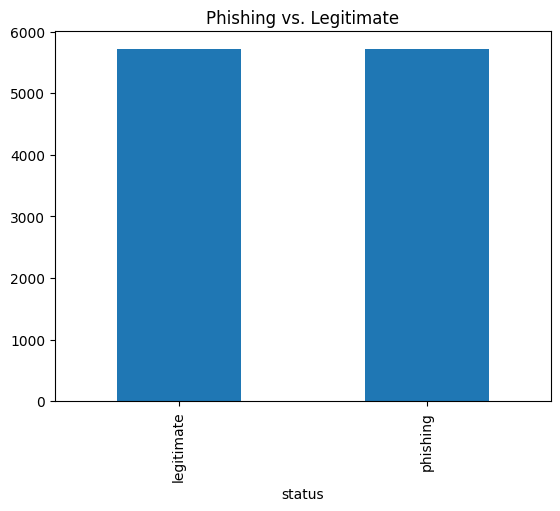

In [ ]:
df['status'].value_counts().plot(kind='bar', title='Phishing vs. Legitimate')


Convert status column to numeric

In [ ]:
df['status'] = df['status'].map({'phishing': 1, 'safe': 0})

In [ ]:
df['status'].head()

,status
0,NaN
1,1.0
2,1.0
3,NaN
4,NaN


In [ ]:
df['status'] = df['status'].fillna(0)
df['status'].head()

,status
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


Identify strongest related numerical data to status column

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
phishing_corr = corr['status'].sort_values(ascending=False)
print(phishing_corr)

status                  1.000000
google_index            0.731171
ratio_digits_url        0.356395
domain_in_title         0.342807
phish_hints             0.335393
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64


# Feature Engineering

In [ ]:
df = df.drop('url', axis=1)

scale values into [0,1] to avoid bias to larger vals

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['length_url', 'length_hostname']] = scaler.fit_transform(df[['length_url', 'length_hostname']])

X is feature matrix. Y is target var (status). Calculate mutual info between X and Y (finds linear and non-linear relationships unlike corr analysis which can only find linear)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop('status', axis=1)
y = df['status']
importance = mutual_info_classif(X, y)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)

google_index           0.301309
web_traffic            0.296666
domain_age             0.279352
ratio_intHyperlinks    0.247910
ratio_extHyperlinks    0.236510
                         ...   
nb_space               0.000000
tld_in_path            0.000000
random_domain          0.000000
port                   0.000000
suspecious_tld         0.000000
Length: 87, dtype: float64


# Building Classification Model

Split into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest classifier -> combines predictions from decsion trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9693788276465442
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



gradient boosting algorithm which sequentially builds trees

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9733158355205599
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1157
         1.0       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



#Analysis of feature imporance from models

In [ ]:
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Random Forest Feature Importance:\n", rf_importance)
print("XGBoost Feature Importance:\n", xgb_importance)

Random Forest Feature Importance:
 google_index            0.165390
page_rank               0.104115
nb_hyperlinks           0.081922
web_traffic             0.079373
nb_www                  0.042660
                          ...   
ratio_intErrors         0.000000
ratio_intRedirection    0.000000
ratio_nullHyperlinks    0.000000
nb_or                   0.000000
nb_star                 0.000000
Length: 87, dtype: float64
XGBoost Feature Importance:
 google_index               0.496623
nb_qm                      0.040017
page_rank                  0.035905
nb_www                     0.027733
suspecious_tld             0.027597
                             ...   
nb_semicolumn              0.000000
nb_dollar                  0.000000
nb_dslash                  0.000000
nb_external_redirection    0.000000
nb_tilde                   0.000000
Length: 87, dtype: float32


In [ ]:
feature_importances = pd.DataFrame({
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance,
    'Mutual Information': feature_importance
}).sort_values(by='Random Forest', ascending=False)

print(feature_importances.head(10))  # View top 10 features for each method


                     Random Forest   XGBoost  Mutual Information
google_index              0.165390  0.496623            0.301309
page_rank                 0.104115  0.035905            0.213091
nb_hyperlinks             0.081922  0.027519            0.236360
web_traffic               0.079373  0.009308            0.296666
nb_www                    0.042660  0.027733            0.116877
domain_age                0.036414  0.005402            0.279352
phish_hints               0.028203  0.019127            0.080460
ratio_extHyperlinks       0.027243  0.005185            0.236510
safe_anchor               0.025116  0.005753            0.176906
ratio_intHyperlinks       0.024228  0.002865            0.247910


Compare most important features of different classification models

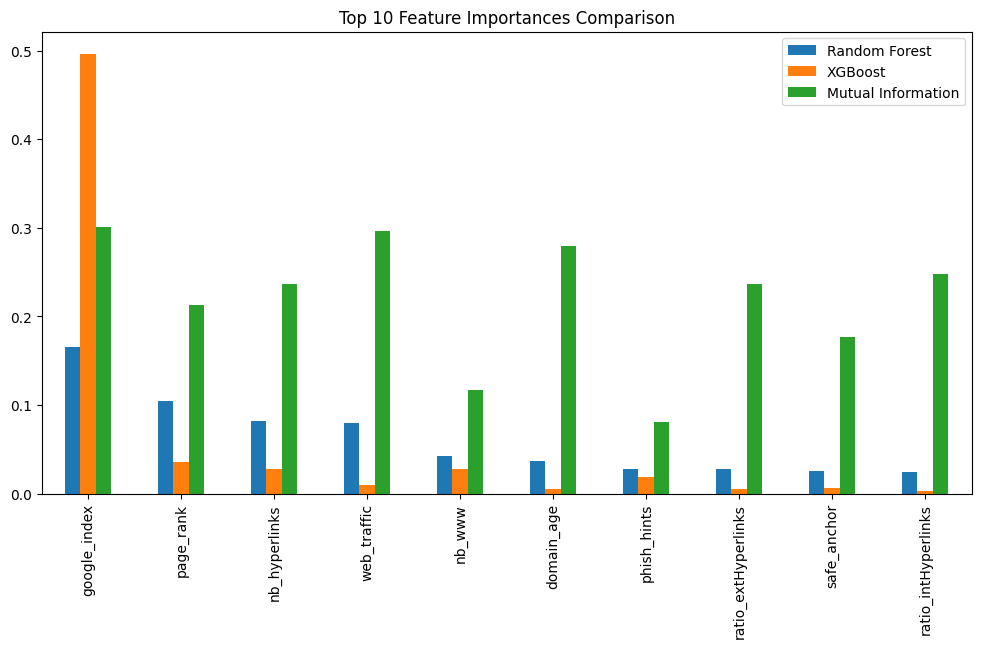

In [ ]:
feature_importances.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Feature Importances Comparison')
plt.show()


Find insignificant features

In [ ]:
low_importance = feature_importances[(feature_importances < 0.001).all(axis=1)]
print("Low importance features:\n", low_importance.index)

Low importance features:
 Index(['brand_in_path', 'iframe', 'nb_tilde', 'nb_comma', 'submit_email',
       'nb_or', 'ratio_intRedirection'],
      dtype='object')


Drop insiginificant features and retrain model

In [ ]:
X_train_reduced = X_train.drop(columns=low_importance.index, errors='ignore')
X_test_reduced = X_test.drop(columns=low_importance.index, errors='ignore')

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_reduced, y_train)

rf_predictions = rf.predict(X_test_reduced)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9715660542432196
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1157
         1.0       0.98      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_reduced, y_train)

xgb_predictions = xgb.predict(X_test_reduced)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.9733158355205599
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1157
         1.0       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

